In [1]:
import pandas as pd 
import numpy as np 
import plotly.express as px
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("../../../data/cpu_utilization_asg_misconfiguration.csv")
df['ds'] = pd.to_datetime(df['timestamp'])
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp' ,  inplace = True)
df.rename(columns={'value': 'y'}, inplace=True)

In [3]:
print(df.head())
df.tail()

                          y                  ds
timestamp                                      
2014-05-14 01:14:00  85.835 2014-05-14 01:14:00
2014-05-14 01:19:00  88.167 2014-05-14 01:19:00
2014-05-14 01:24:00  44.595 2014-05-14 01:24:00
2014-05-14 01:29:00  56.282 2014-05-14 01:29:00
2014-05-14 01:34:00  36.534 2014-05-14 01:34:00


y                  ds
timestamp                                      
2014-07-15 16:59:00  13.498 2014-07-15 16:59:00
2014-07-15 17:04:00  19.831 2014-07-15 17:04:00
2014-07-15 17:09:00  27.165 2014-07-15 17:09:00
2014-07-15 17:14:00  12.873 2014-07-15 17:14:00
2014-07-15 17:19:00  12.129 2014-07-15 17:19:00

Basic Plot 

In [4]:
fig = px.line(df, x=df.index, y="y",title="cpu usage graph")
fig.show()

Doing a Seasonal Decompoition


In [4]:
df.asfreq(pd.infer_freq(df.index))
df.index.freq

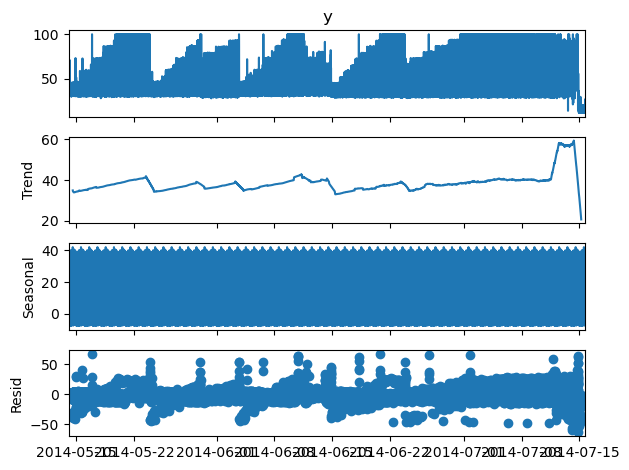

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['y'] , period = ((24*60)//5))  # model='mul' also works
result.plot();

In [7]:
result.seasonal.index

DatetimeIndex(['2014-05-14 01:14:00', '2014-05-14 01:19:00',
               '2014-05-14 01:24:00', '2014-05-14 01:29:00',
               '2014-05-14 01:34:00', '2014-05-14 01:39:00',
               '2014-05-14 01:44:00', '2014-05-14 01:49:00',
               '2014-05-14 01:54:00', '2014-05-14 01:59:00',
               ...
               '2014-07-15 16:34:00', '2014-07-15 16:39:00',
               '2014-07-15 16:44:00', '2014-07-15 16:49:00',
               '2014-07-15 16:54:00', '2014-07-15 16:59:00',
               '2014-07-15 17:04:00', '2014-07-15 17:09:00',
               '2014-07-15 17:14:00', '2014-07-15 17:19:00'],
              dtype='datetime64[ns]', name='timestamp', length=18050, freq=None)

In [8]:
df_seasonal = pd.DataFrame({'ds':result.seasonal.index, 'y':result.seasonal.values})
df_seasonal.dropna(inplace=True)
df['timestamp'] = pd.to_datetime(df['ds'])
df.set_index('timestamp' ,  inplace = True)

In [9]:
fig = px.line(df_seasonal ,  x=df_seasonal.index, y=df_seasonal.y,title="seasonality")
fig.show()

Data Dsistribution analysis

In [10]:
# df = px.data.tips()
fig = px.histogram(df, x="y", y="y",
                   marginal="box", # or violin, rug
                   hover_data=df.columns)
fig.show()

In [11]:
# df = px.data.tips()
fig = px.histogram(df, x="y", y="y",
                   marginal="violin", # or violin, rug
                   hover_data=df.columns)
fig.show()

Data Distribution analysis 

In [13]:
import plotly.figure_factory as ff
# Plot the distribution of the dataset value
fig = ff.create_distplot([df['y']], ['y'], bin_size=0.1)
fig.show()

Using Prophet

In [14]:
from prophet import Prophet

m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=5)
fcst =m.predict(df)
fcst

16:50:09 - cmdstanpy - INFO - Chain [1] start processing
16:50:11 - cmdstanpy - INFO - Chain [1] done processing


ds      trend  yhat_lower  yhat_upper  trend_lower  \
0     2014-05-14 01:14:00  35.262800   13.509601   53.254466    35.262800   
1     2014-05-14 01:19:00  35.264016   14.274888   52.717764    35.264016   
2     2014-05-14 01:24:00  35.265232   16.128392   55.262861    35.265232   
3     2014-05-14 01:29:00  35.266448   14.383459   54.952232    35.266448   
4     2014-05-14 01:34:00  35.267664   13.667636   52.034772    35.267664   
...                   ...        ...         ...         ...          ...   
18045 2014-07-15 16:59:00  44.867455   22.413343   63.710564    44.867455   
18046 2014-07-15 17:04:00  44.868936   24.205808   63.466585    44.868936   
18047 2014-07-15 17:09:00  44.870416   22.294400   63.570316    44.870416   
18048 2014-07-15 17:14:00  44.871897   22.502942   61.742283    44.871897   
18049 2014-07-15 17:19:00  44.873378   23.693887   62.219415    44.873378   

       trend_upper  additive_terms  additive_terms_lower  \
0        35.262800       -1.509060             -1.509060   
1        35.264016       -1.477849             -1.477849   
2        35.265232       -1.446560             -1.446560   
3        35.266448       -1.415319             -1.415319   
4        35.267664       -1.384245             -1.384245   
...            ...             ...                   ...   
18045    44.867455       -1.973360             -1.973360   
18046    44.868936       -1.933683             -1.933683   
18047    44.870416       -1.893232             -1.893232   
18048    44.871897       -1.852113             -1.852113   
18049    44.873378       -1.810440             -1.810440   

       additive_terms_upper     daily  daily_lower  daily_upper    weekly  \
0                 -1.509060 -0.232799    -0.232799    -0.232799 -1.276261   
1                 -1.477849 -0.213777    -0.213777    -0.213777 -1.264072   
2                 -1.446560 -0.194684    -0.194684    -0.194684 -1.251876   
3                 -1.415319 -0.175647    -0.175647    -0.175647 -1.239672   
4                 -1.384245 -0.156783    -0.156783    -0.156783 -1.227462   
...                     ...       ...          ...          ...       ...   
18045             -1.973360  0.334833     0.334833     0.334833 -2.308192   
18046             -1.933683  0.367052     0.367052     0.367052 -2.300735   
18047             -1.893232  0.399963     0.399963     0.399963 -2.293194   
18048             -1.852113  0.433459     0.433459     0.433459 -2.285572   
18049             -1.810440  0.467428     0.467428     0.467428 -2.277868   

       weekly_lower  weekly_upper  multiplicative_terms  \
0         -1.276261     -1.276261                   0.0   
1         -1.264072     -1.264072                   0.0   
2         -1.251876     -1.251876                   0.0   
3         -1.239672     -1.239672                   0.0   
4         -1.227462     -1.227462                   0.0   
...             ...           ...                   ...   
18045     -2.308192     -2.308192                   0.0   
18046     -2.300735     -2.300735                   0.0   
18047     -2.293194     -2.293194                   0.0   
18048     -2.285572     -2.285572                   0.0   
18049     -2.277868     -2.277868                   0.0   

       multiplicative_terms_lower  multiplicative_terms_upper       yhat  
0                             0.0                         0.0  33.753740  
1                             0.0                         0.0  33.786167  
2                             0.0                         0.0  33.818672  
3                             0.0                         0.0  33.851129  
4                             0.0                         0.0  33.883419  
...                           ...                         ...        ...  
18045                         0.0                         0.0  42.894095  
18046                         0.0                         0.0  42.935253  
18047                         0.0                         0.0  42.97

/opt/miniconda3/envs/mlOps/lib/python3.11/site-packages/prophet/plot.py:71: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/opt/miniconda3/envs/mlOps/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



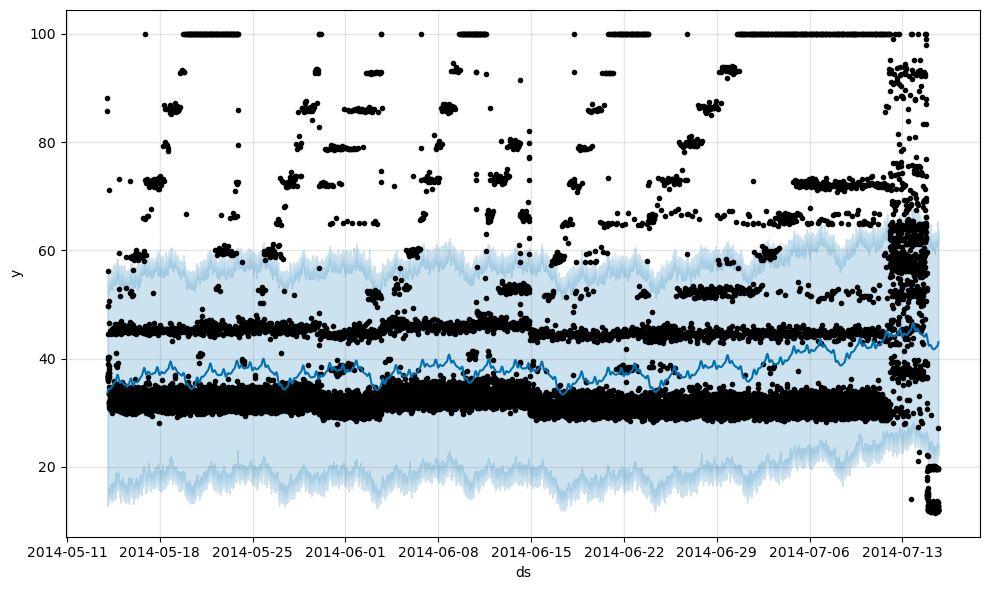

In [15]:
m.plot(fcst);

In [16]:
# Create empty dataframes for anomalies and thresholds
anomalies_df = pd.DataFrame(index=df.index, columns=['anomaly_uncertainty', 'anomaly_yhat_upper'])
threshold_df = pd.DataFrame(index=df.index, columns=['threshold_uncertainity', 'threshold_yhat_upper', 'threshold_error'])

In [17]:
for i in range(4032, len(df), 36):
    train_df = df.iloc[i-4032:i]
    m = Prophet()
    m.fit(train_df)
    future = m.make_future_dataframe(periods=36, freq='5min')
    forecast = m.predict(future)
    forecast_df = forecast[['ds','yhat','yhat_upper','yhat_lower']]
    forecast_df['timestamp'] = forecast_df['ds']
    forecast_df.set_index('timestamp', inplace=True)
    
    # Check if the current 36 data points are anomalies
    upper_limit = i+36
    if upper_limit > len(df):
        upper_limit = len(df)
    for j in range(i, upper_limit):
        threshold_df.loc[df.index[j],"threshold_yhat_upper"] = forecast_df.loc[df.index[j] , 'yhat_upper']
        threshold_df.loc[df.index[j],"threshold_uncertainity"] = forecast_df.loc[df.index[j], 'yhat_upper'] - forecast_df.loc[df.index[j], 'yhat_lower']
        threshold_df.loc[df.index[j],"threshold_error"] = df.loc[df.index[j],'y'] - forecast_df.loc[df.index[j], 'yhat_upper']
        if df.loc[df.index[j], 'y'] > forecast_df.loc[df.index[j], 'yhat_upper']:
            anomalies_df.loc[df.index[j],"anomaly_yhat_upper"] = True
        else:
            anomalies_df.loc[df.index[j],"anomaly_yhat_upper"] = False
        if df.loc[df.index[j], 'y'] - forecast_df.loc[df.index[j], 'yhat_upper'] > forecast_df.loc[df.index[j], 'yhat_upper'] - forecast_df.loc[df.index[j], 'yhat_lower']:
            anomalies_df.loc[df.index[j],"anomaly_uncertainty"] = True
        else:
            anomalies_df.loc[df.index[j],"anomaly_uncertainty"] = False

# Join the anomalies_df with the df
df = df.join(anomalies_df)
df = df.join(threshold_df)
df.head()

16:50:20 - cmdstanpy - INFO - Chain [1] start processing
16:50:21 - cmdstanpy - INFO - Chain [1] done processing
16:50:21 - cmdstanpy - INFO - Chain [1] start processing
16:50:21 - cmdstanpy - INFO - Chain [1] done processing
16:50:22 - cmdstanpy - INFO - Chain [1] start processing
16:50:22 - cmdstanpy - INFO - Chain [1] done processing
16:50:22 - cmdstanpy - INFO - Chain [1] start processing
16:50:22 - cmdstanpy - INFO - Chain [1] done processing
16:50:23 - cmdstanpy - INFO - Chain [1] start processing
16:50:23 - cmdstanpy - INFO - Chain [1] done processing
16:50:23 - cmdstanpy - INFO - Chain [1] start processing
16:50:23 - cmdstanpy - INFO - Chain [1] done processing
16:50:24 - cmdstanpy - INFO - Chain [1] start processing
16:50:24 - cmdstanpy - INFO - Chain [1] done processing
16:50:24 - cmdstanpy - INFO - Chain [1] start processing
16:50:25 - cmdstanpy - INFO - Chain [1] done processing
16:50:25 - cmdstanpy - INFO - Chain [1] start processing
16:50:25 - cmdstanpy - INFO - Chain [1]

y                  ds anomaly_uncertainty  \
timestamp                                                             
2014-05-14 01:14:00  85.835 2014-05-14 01:14:00                 NaN   
2014-05-14 01:19:00  88.167 2014-05-14 01:19:00                 NaN   
2014-05-14 01:24:00  44.595 2014-05-14 01:24:00                 NaN   
2014-05-14 01:29:00  56.282 2014-05-14 01:29:00                 NaN   
2014-05-14 01:34:00  36.534 2014-05-14 01:34:00                 NaN   

                    anomaly_yhat_upper threshold_uncertainity  \
timestamp                                                       
2014-05-14 01:14:00                NaN                    NaN   
2014-05-14 01:19:00                NaN                    NaN   
2014-05-14 01:24:00                NaN                    NaN   
2014-05-14 01:29:00                NaN                    NaN   
2014-05-14 01:34:00                NaN                    NaN   

                    threshold_yhat_upper threshold_error  
timestamp                                                 
2014-05-14 01:14:00                  NaN             NaN  
2014-05-14 01:19:00                  NaN             NaN  
2014-05-14 01:24:00                  NaN             NaN  
2014-05-14 01:29:00                  NaN             NaN  
2014-05-14 01:34:00                  NaN             NaN